In [1]:
!pip install transformers > /dev/null

In [2]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

In [3]:
img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg'
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')


In [13]:
!wget https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg

--2023-06-26 15:30:26--  https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 142.250.103.128, 108.177.121.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 496395 (485K) [image/jpeg]
Saving to: ‘demo.jpg’

demo.jpg            100%[===================>] 484.76K  --.-KB/s    in 0.006s  

2023-06-26 15:30:26 (74.4 MB/s) - ‘demo.jpg’ saved [496395/496395]



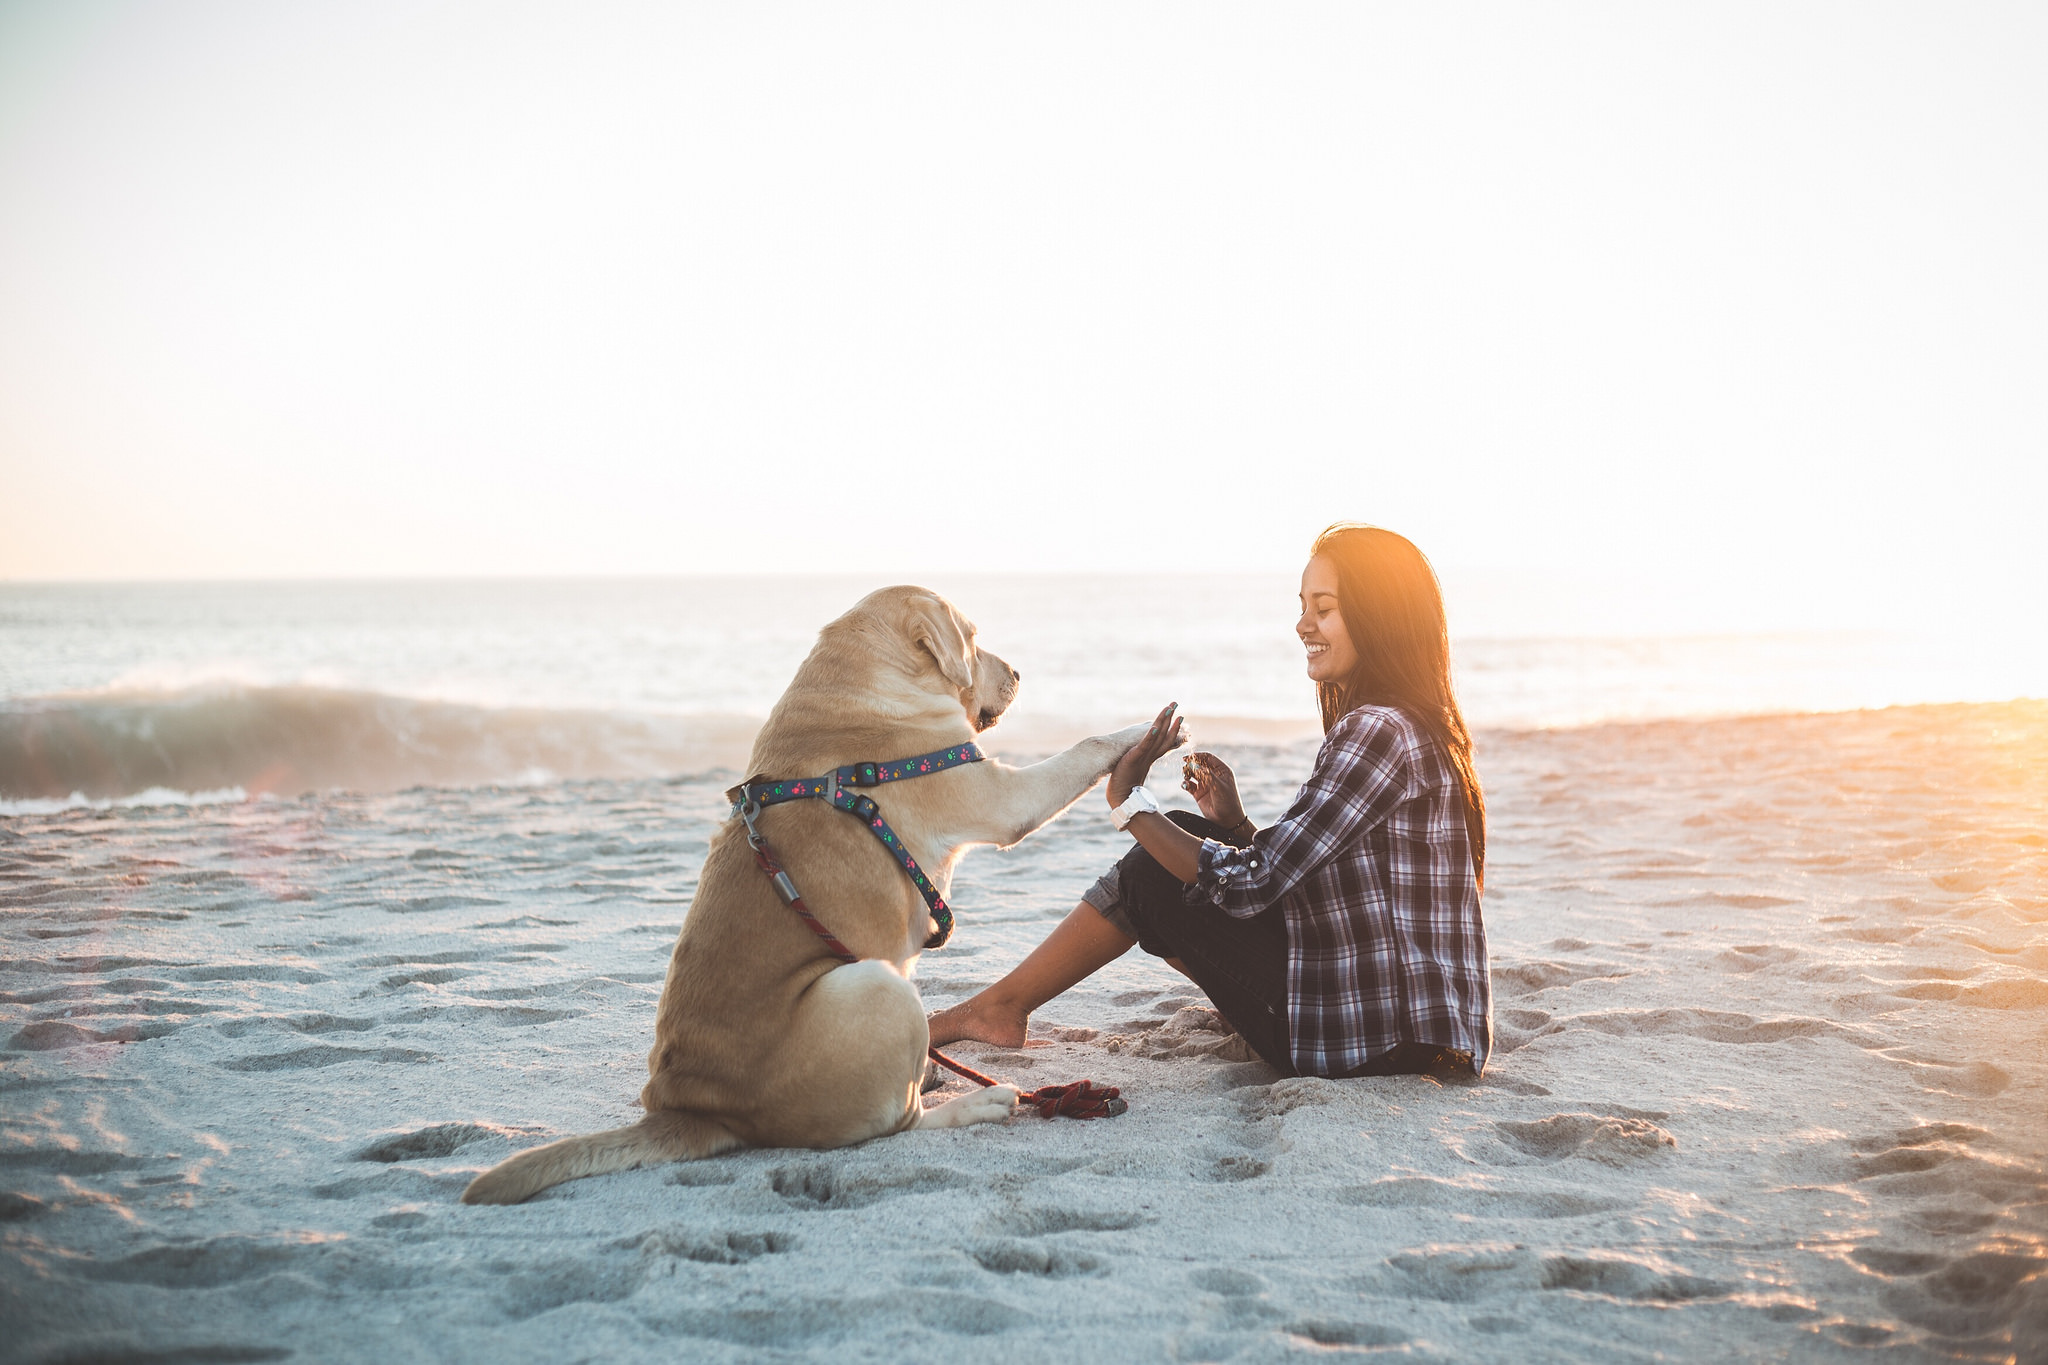

In [7]:
raw_image

In [4]:
# conditional image captioning
text = "a photography of"
inputs = processor(raw_image, text, return_tensors="pt")

In [5]:
inputs

{'pixel_values': tensor([[[[ 0.8647,  0.9230,  0.9376,  ...,  1.7552,  1.7552,  1.7552],
          [ 0.9084,  0.9376,  0.9522,  ...,  1.7552,  1.7552,  1.7552],
          [ 0.9376,  0.9376,  0.9668,  ...,  1.7552,  1.7552,  1.7552],
          ...,
          [-0.7850, -0.7850, -0.7266,  ..., -0.3178, -0.2740, -0.3616],
          [-0.7558, -0.7558, -0.7412,  ..., -0.3178, -0.3616, -0.4346],
          [-0.7558, -0.7704, -0.7850,  ..., -0.3616, -0.4346, -0.4784]],

         [[ 1.2194,  1.2495,  1.2795,  ...,  1.8948,  1.8948,  1.8948],
          [ 1.2344,  1.2645,  1.2945,  ...,  1.8948,  1.8948,  1.8948],
          [ 1.2495,  1.2795,  1.3095,  ...,  1.8948,  1.8948,  1.8948],
          ...,
          [-0.5965, -0.5965, -0.5515,  ..., -0.4014, -0.3264, -0.4164],
          [-0.5665, -0.5665, -0.5515,  ..., -0.3864, -0.4164, -0.4914],
          [-0.5665, -0.5815, -0.5965,  ..., -0.4164, -0.4764, -0.5365]],

         [[ 1.2927,  1.3211,  1.3496,  ...,  1.9753,  1.9753,  1.9753],
          [ 1

In [6]:
out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))
# >>> a photography of a woman and her dog

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1353: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


a photography of a woman and her dog on the beach


In [8]:
# unconditional image captioning
inputs = processor(raw_image, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1353: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


a woman sitting on the beach with her dog


In [ ]:
!pip install sagemaker > /dev/null

In [10]:
from sagemaker.serializers import DataSerializer

In [11]:
img_serializer = DataSerializer(content_type='image/x-image')

In [15]:
img_data = img_serializer.serialize("/content/demo.jpg")

In [19]:
from sagemaker.deserializers import DataDeserializers

ImportError: ignored

In [17]:
!wget https://huggingface.co/datasets/hf-internal-testing/fixtures_ade20k/raw/main/ADE_val_00000001.jpg

--2023-06-26 15:34:20--  https://huggingface.co/datasets/hf-internal-testing/fixtures_ade20k/raw/main/ADE_val_00000001.jpg
Resolving huggingface.co (huggingface.co)... 99.84.160.57, 99.84.160.64, 99.84.160.9, ...
Connecting to huggingface.co (huggingface.co)|99.84.160.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52650 (51K) [image/jpeg]
Saving to: ‘ADE_val_00000001.jpg’

ADE_val_00000001.jp 100%[===================>]  51.42K  --.-KB/s    in 0.01s   

2023-06-26 15:34:20 (4.73 MB/s) - ‘ADE_val_00000001.jpg’ saved [52650/52650]



In [16]:
new_inputs = processor(img_data, return_tensors="pt")

ValueError: ignored